# Creación de Gif

Aprendí que generar un gif es tan sencillo como generar una imagen, bueno... muchas imagenes.

La forma de generar un gif es usando el modulo imageio. Lo que básicamente hace es tomar una lista de imagenes y juntarlas para crear el gif a travéz del método mimsave()

In [68]:
# Como ejemplo tomaré el conjunto de Mandelbrot

from matplotlib import pyplot as plt
import numpy as np

In [126]:
def plot_mandelbrot(k, res=1000):
    # Creamos una rejilla o malla como dominio
    # res = 1000    # Resolution
    xmin, xmax = -2.25, 1
    ymin, ymax = -1.25, 1.25
    
    delta = (xmax-xmin)/res        # Longitud de paso en la discretización
    re, im = np.mgrid[xmin:xmax:delta, ymin:ymax:delta]    # Dominio discretizado (malla) 
    c = (re + 1j*im).reshape(im.shape[0], -1).T     # Arreglo de complejos c

    z = np.zeros_like(c)
    escape = np.zeros_like(np.absolute(c))
    for i in range(150):
        # Hacemos una animación modificando el exponente de la función
        z = z**k + c  # Mandelbrot eq
        # Iteraciones que dependen del punto (serán las que graficaremos)
        idx = (np.absolute(z)>4) & (escape == 0)
        escape[idx] = i
    
    # Graficamos
    plt.figure(figsize=(20,10))
    plt.imshow(escape, extent=(xmin, xmax, ymin, ymax))
    plt.axis(False)
    plt.savefig(f'mandelbrot_{k}_{res}.png')

C:\Users\gajim\AppData\Local\Temp/ipykernel_14008/1609584875.py:15: RuntimeWarning: overflow encountered in square
  z = z**k + c  # Mandelbrot eq
C:\Users\gajim\AppData\Local\Temp/ipykernel_14008/1609584875.py:15: RuntimeWarning: invalid value encountered in square
  z = z**k + c  # Mandelbrot eq


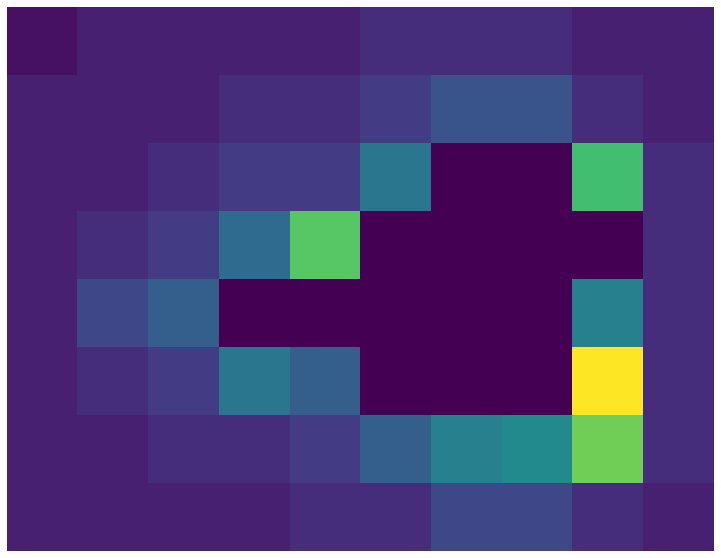

In [127]:
plot_mandelbrot(2, 10)

In [149]:
# Corremos n veces la función (generamos n imágenes en función de k, el exponente de z**k + c)
#n = 50
#ks = np.linspace(1, 5, n)
#for k in ks:
#    plot_mandelbrot(k)

C:\Users\gajim\AppData\Local\Temp/ipykernel_14008/1609584875.py:15: RuntimeWarning: overflow encountered in square
  z = z**k + c  # Mandelbrot eq
C:\Users\gajim\AppData\Local\Temp/ipykernel_14008/1609584875.py:15: RuntimeWarning: invalid value encountered in square
  z = z**k + c  # Mandelbrot eq
C:\Users\gajim\AppData\Local\Temp/ipykernel_14008/1609584875.py:17: RuntimeWarning: overflow encountered in absolute
  idx = (np.absolute(z)>4) & (escape == 0)
C:\Users\gajim\AppData\Local\Temp/ipykernel_14008/1609584875.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


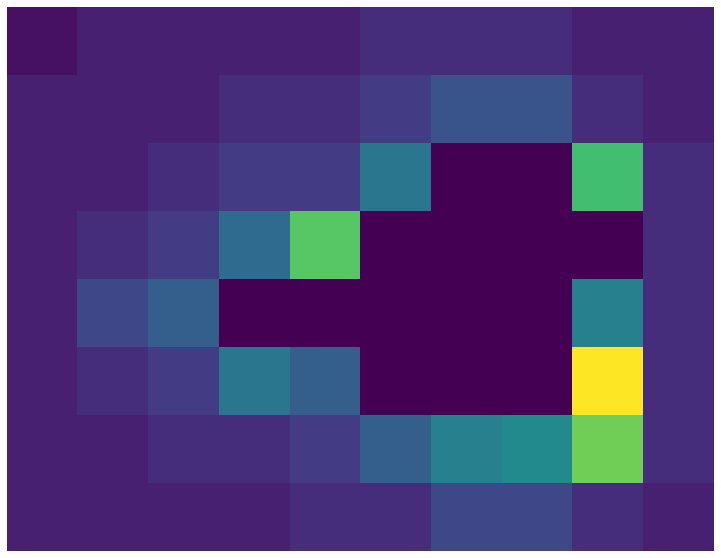

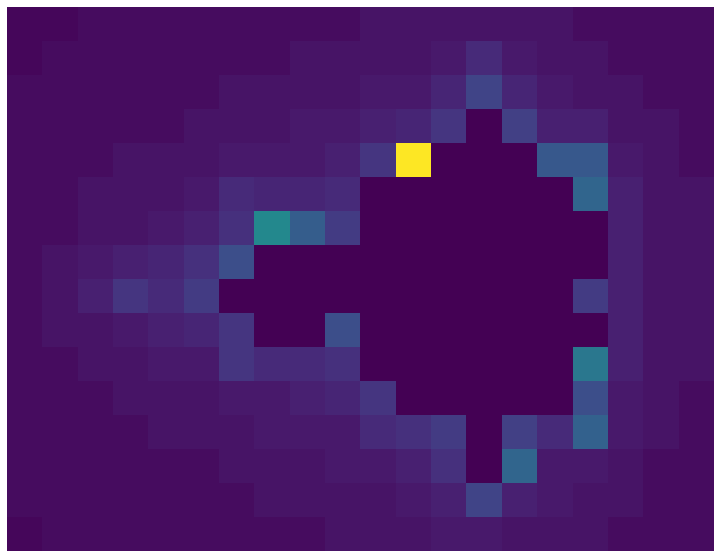

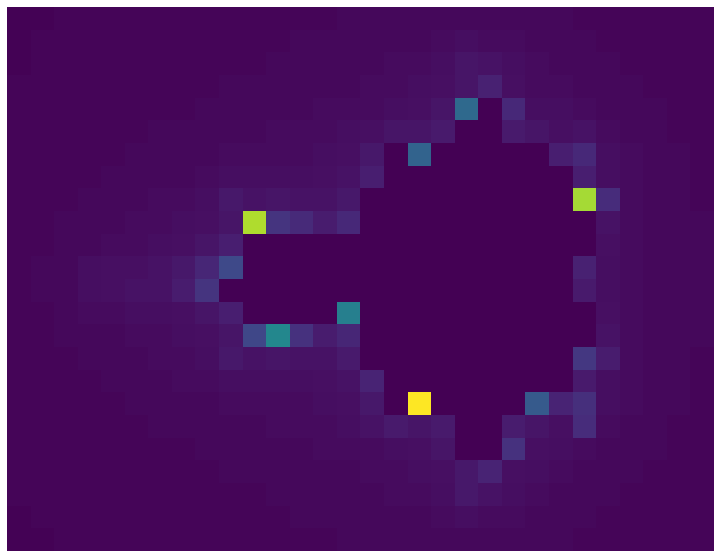

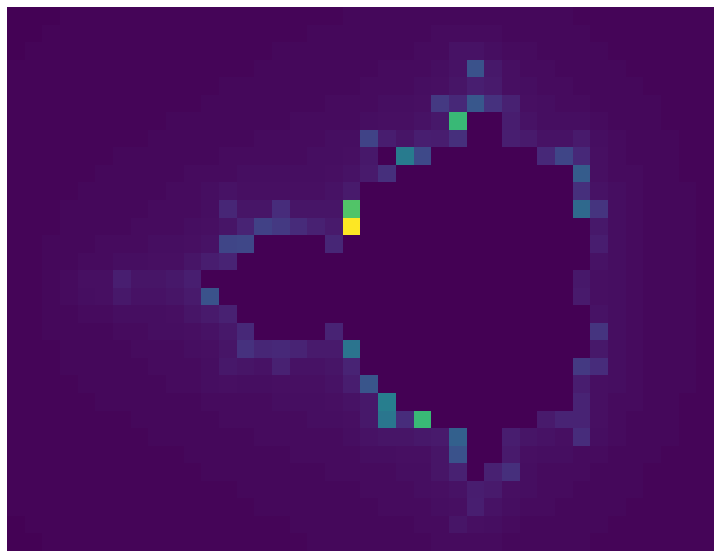

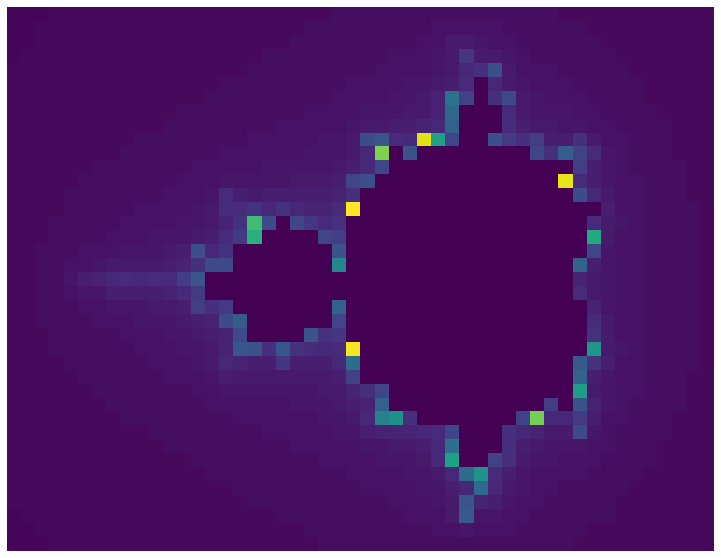

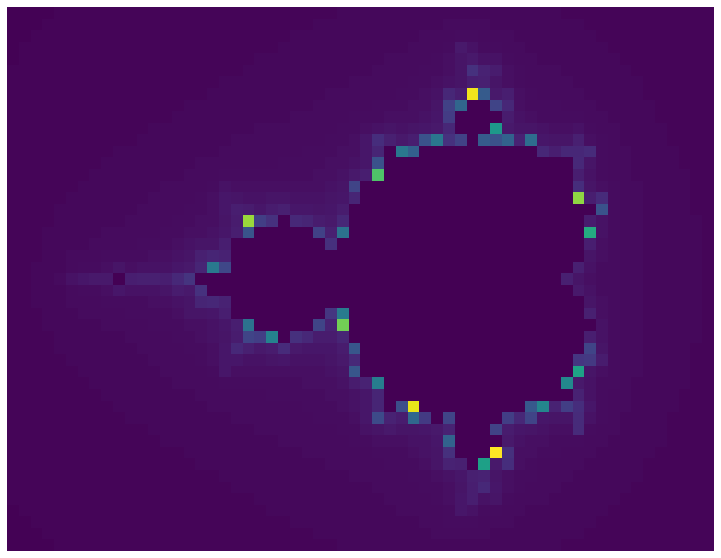

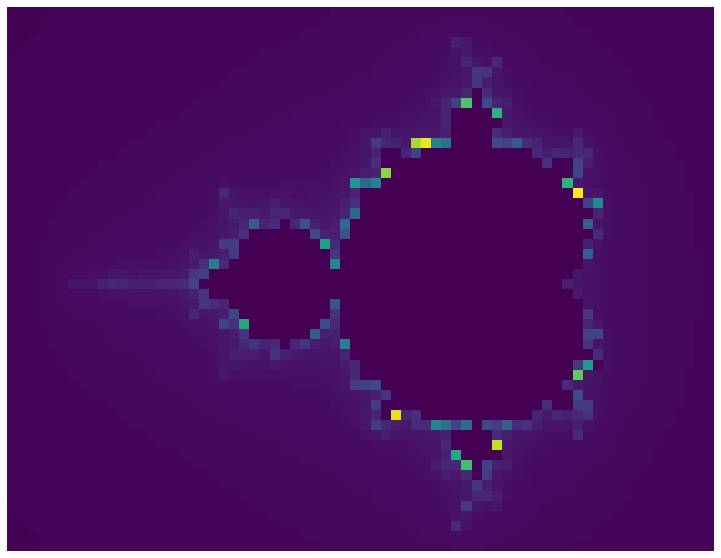

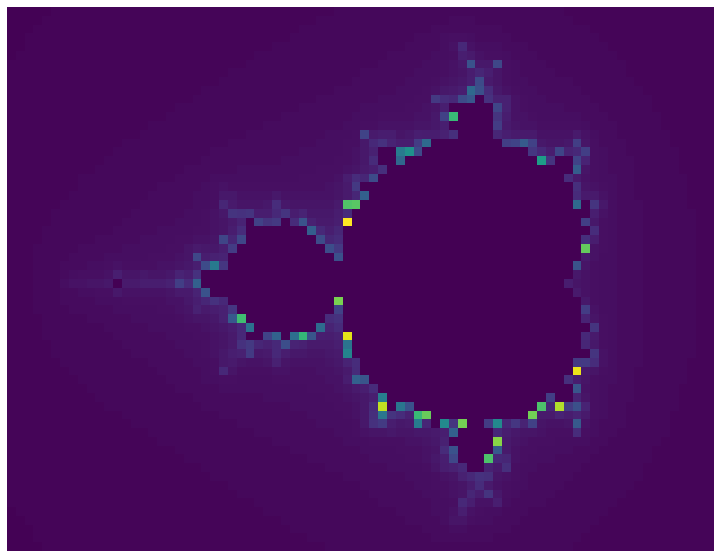

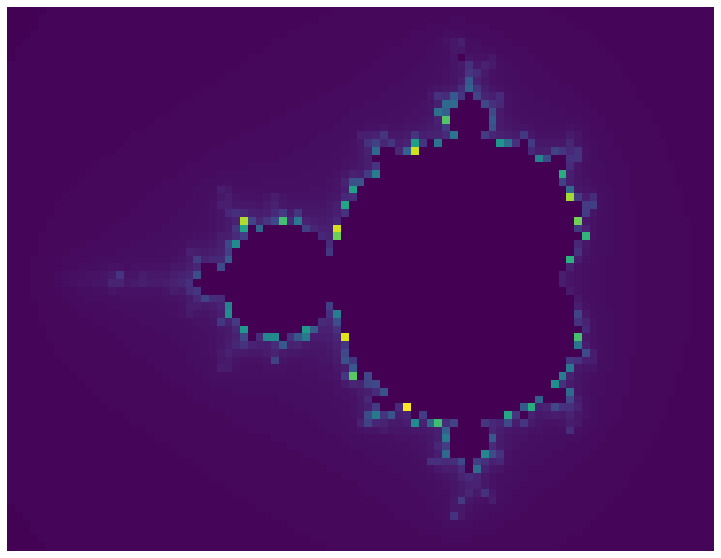

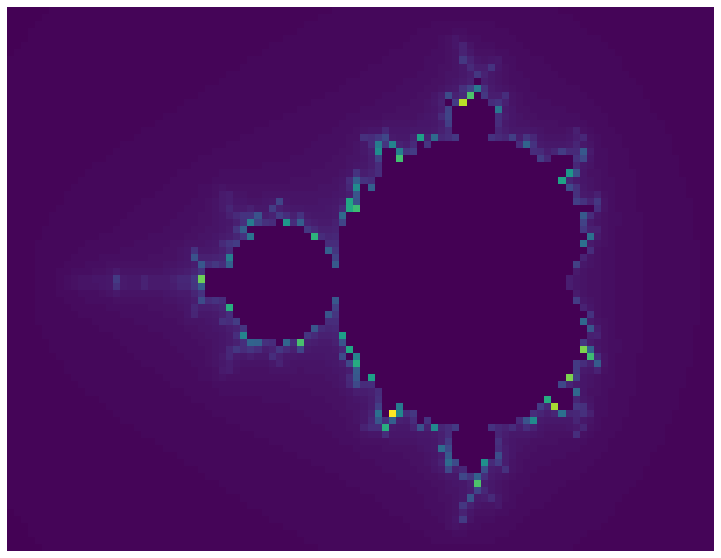

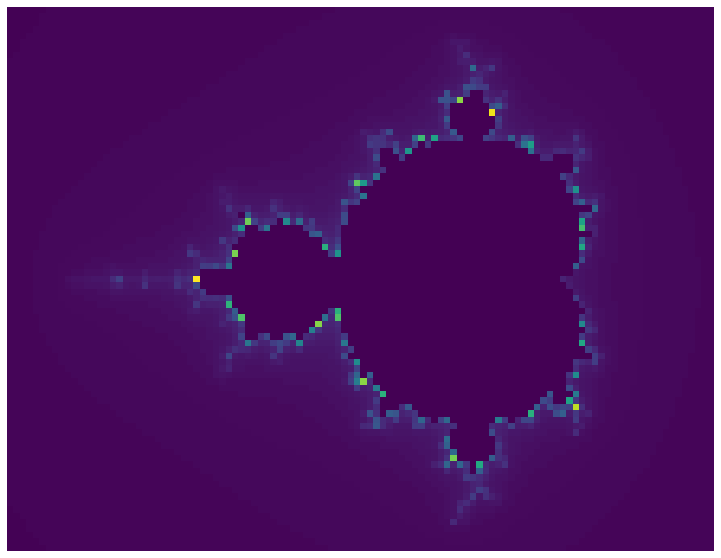

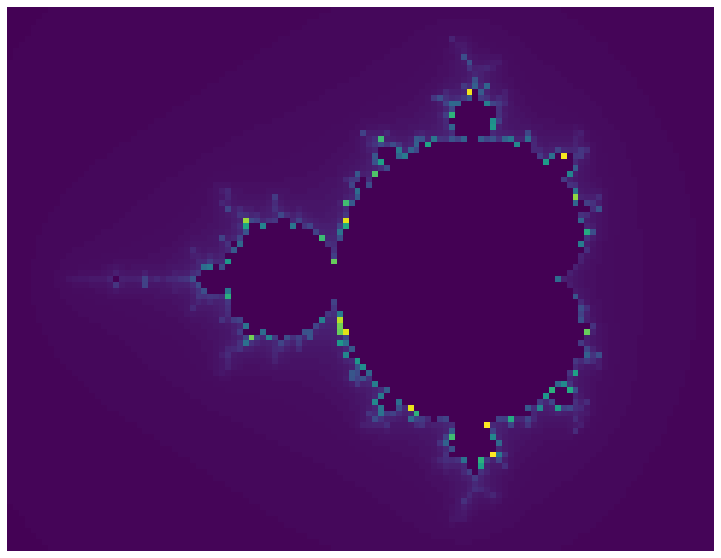

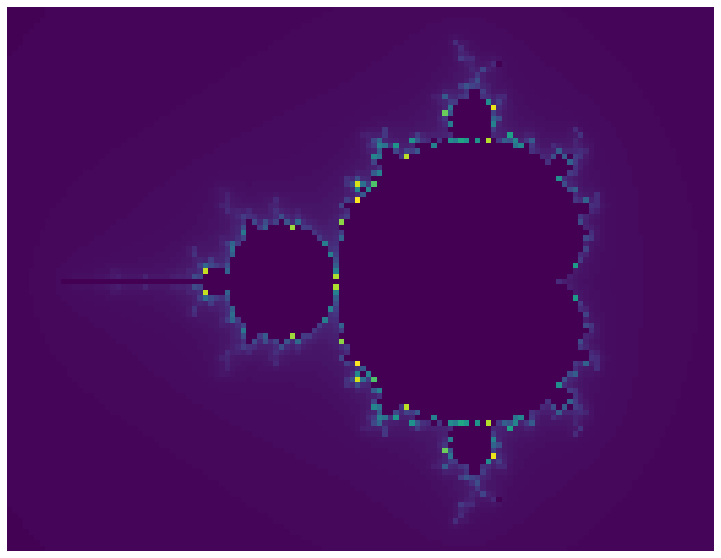

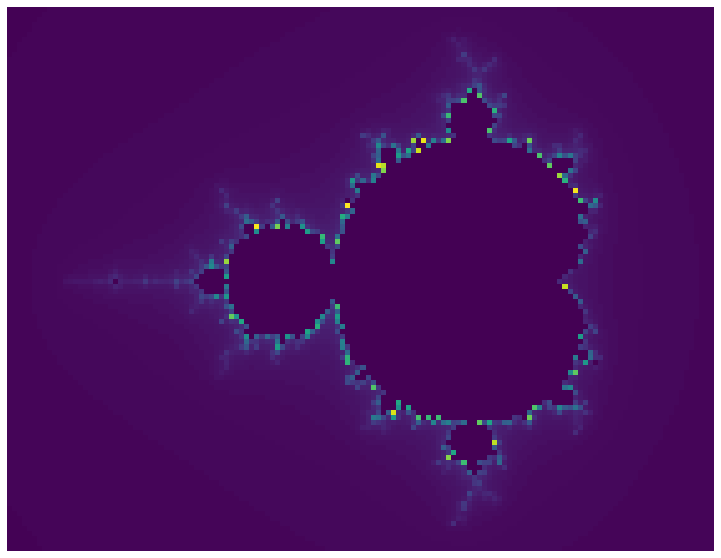

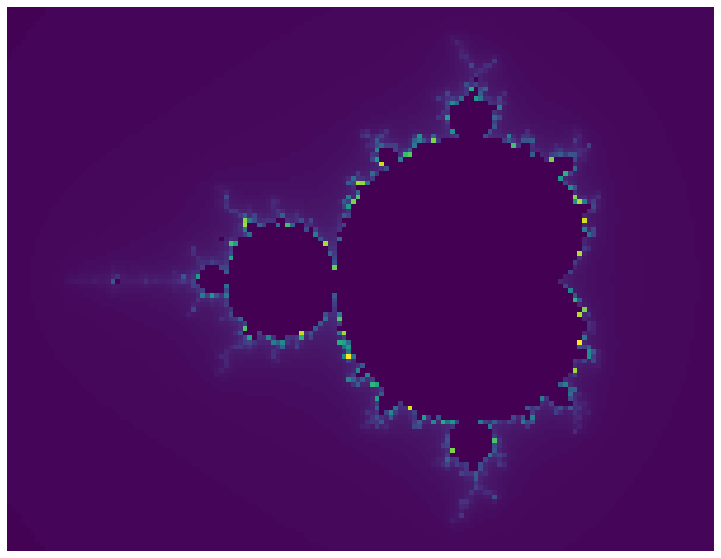

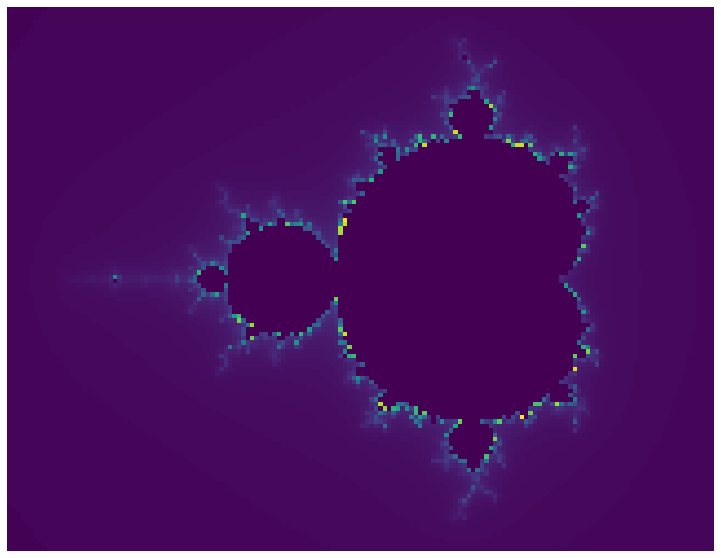

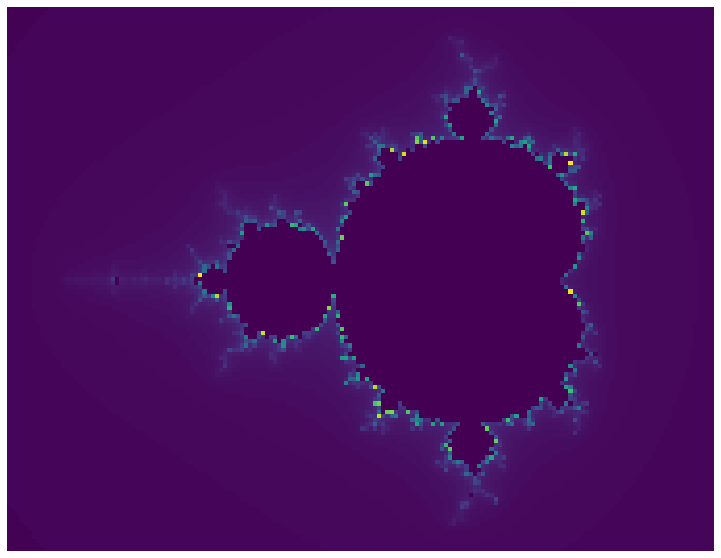

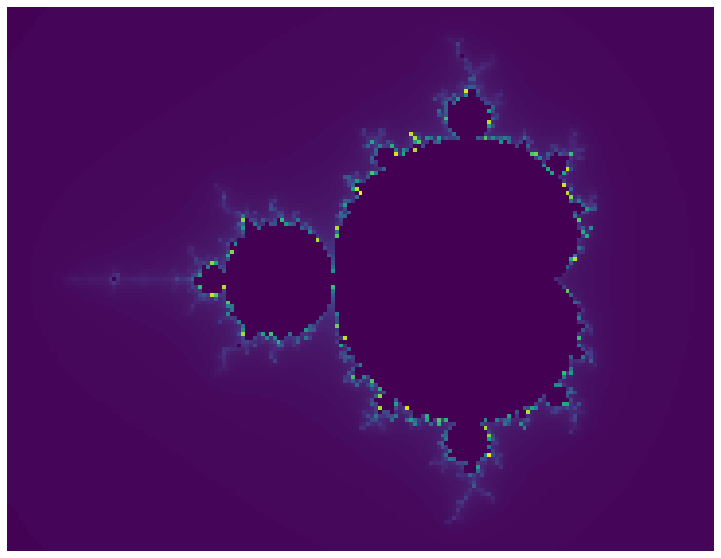

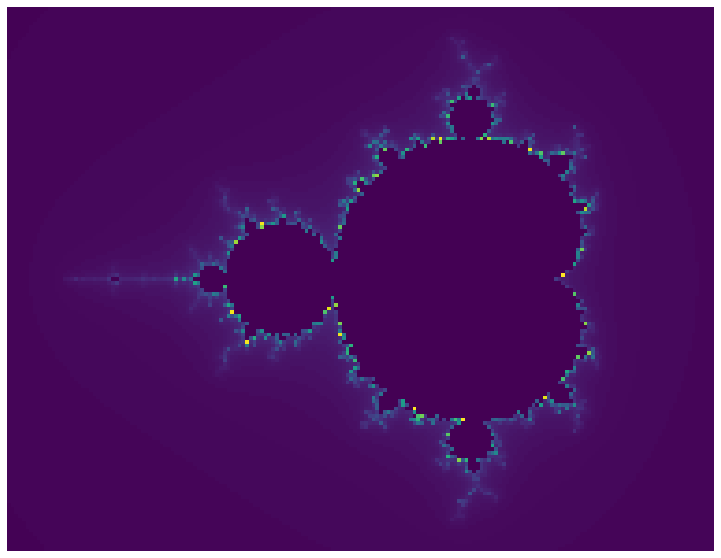

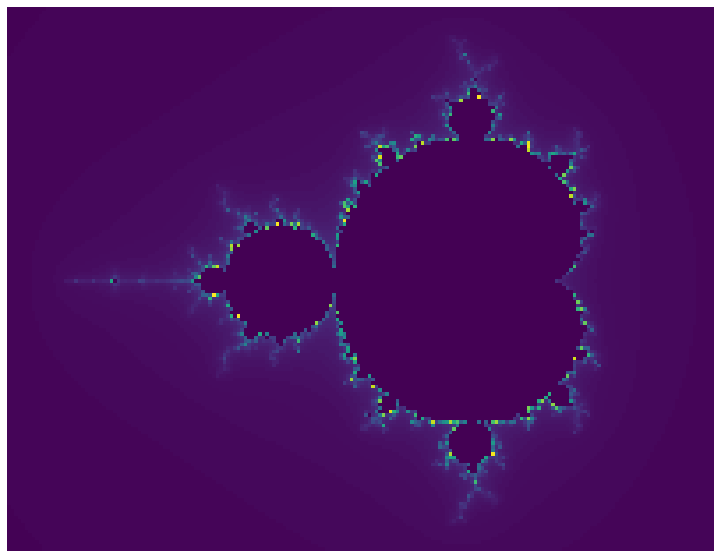

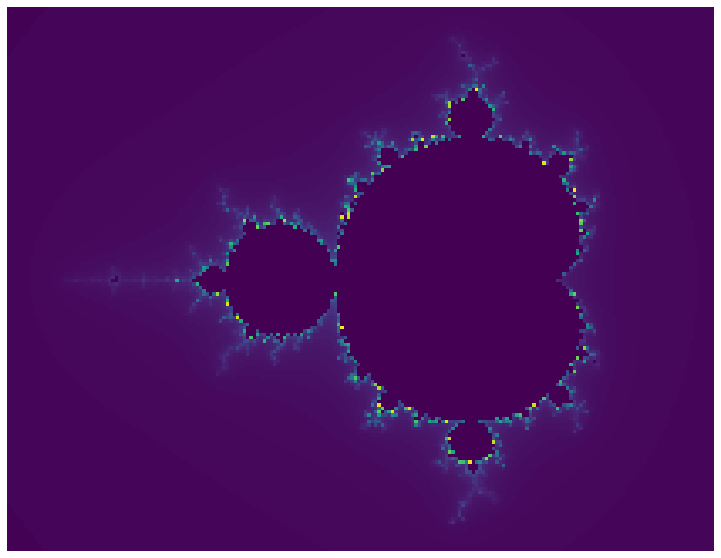

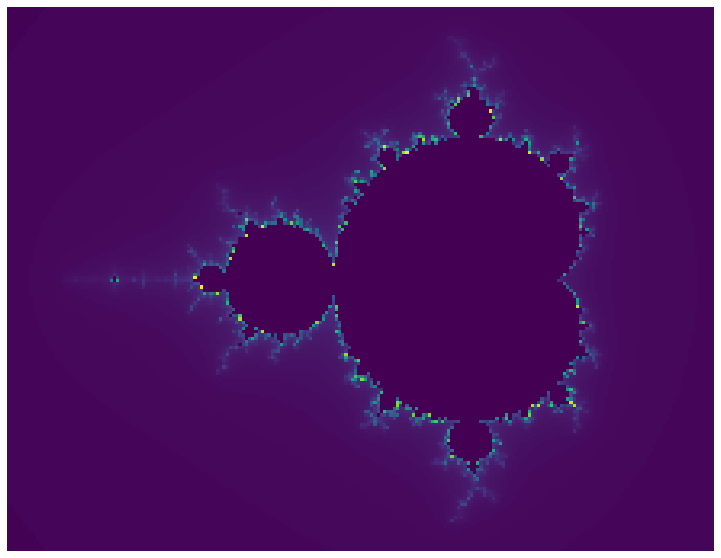

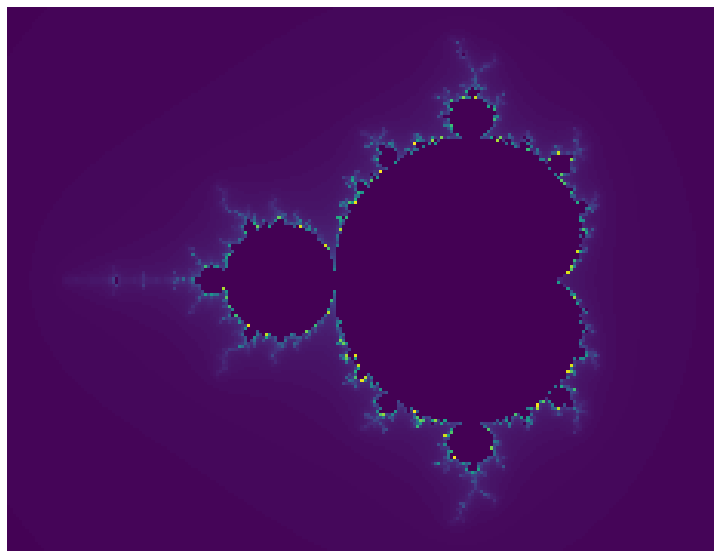

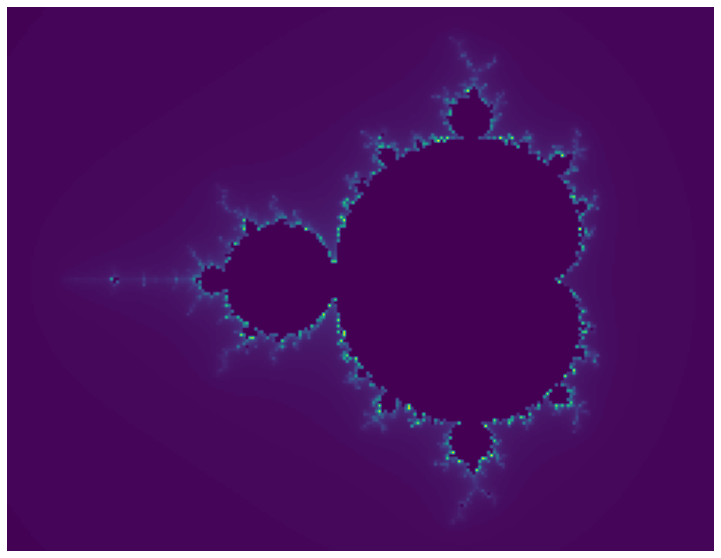

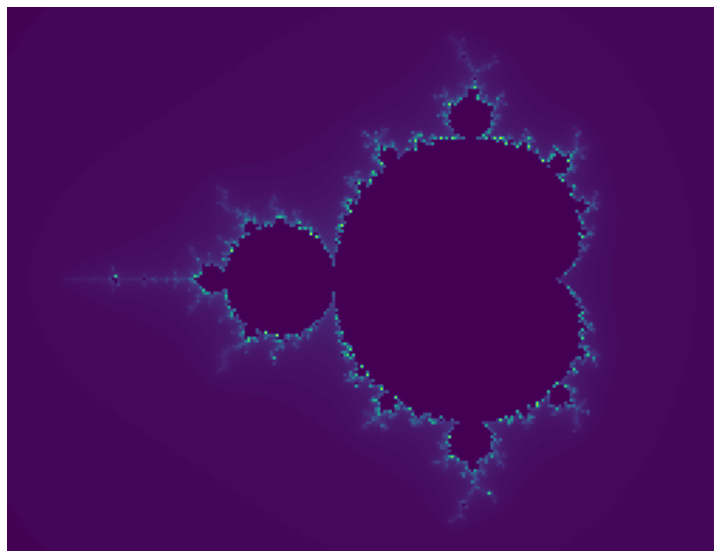

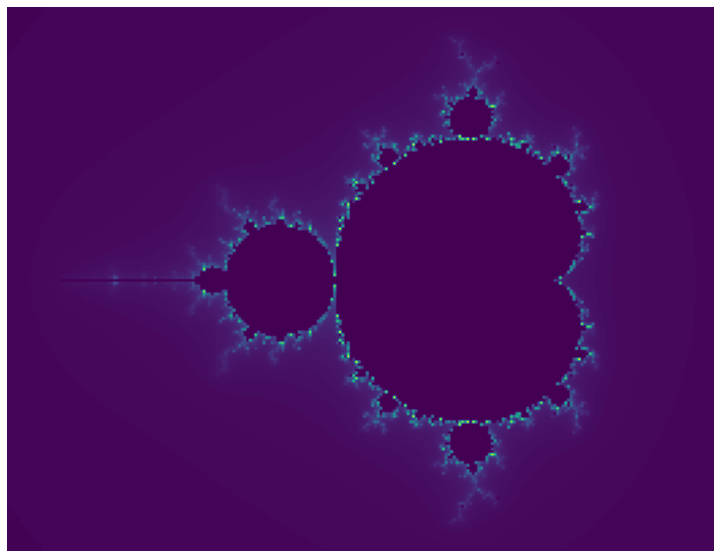

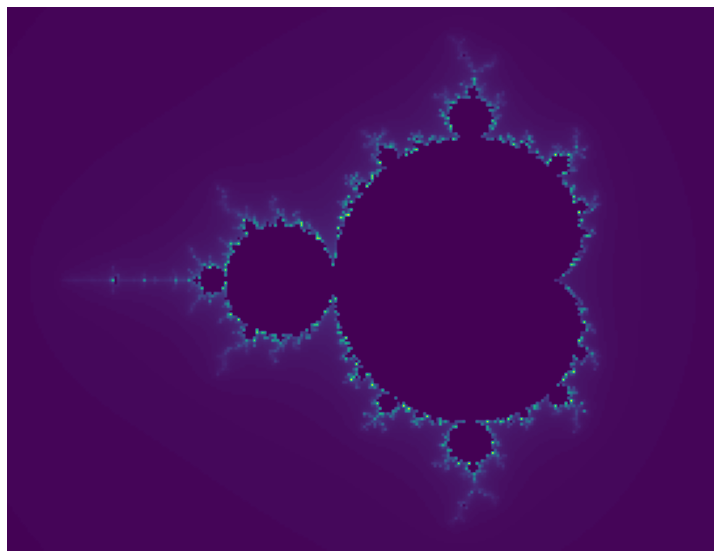

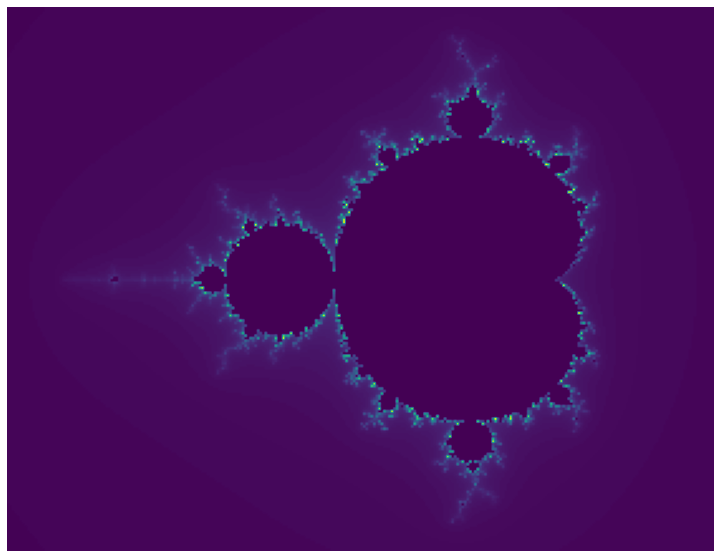

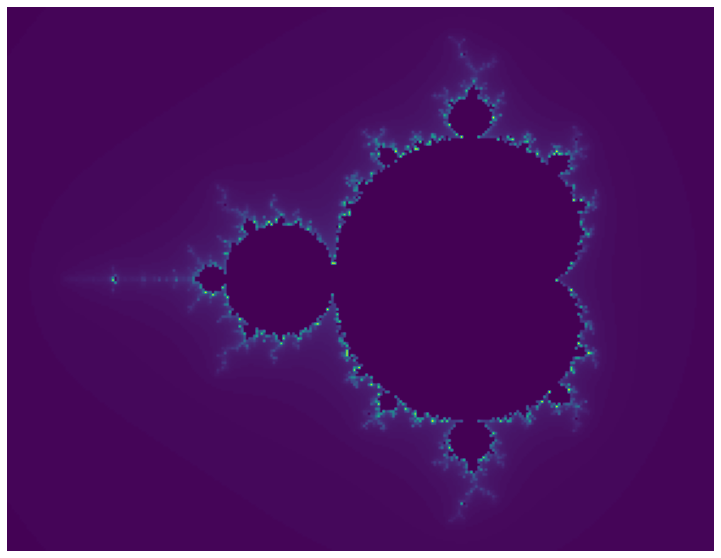

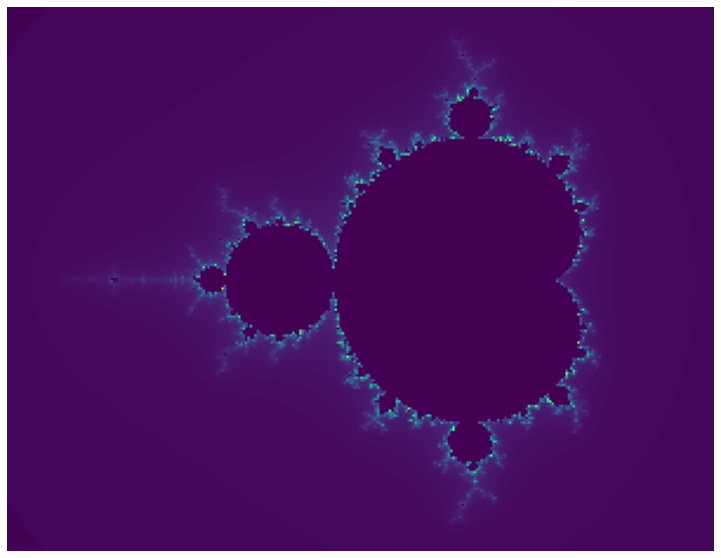

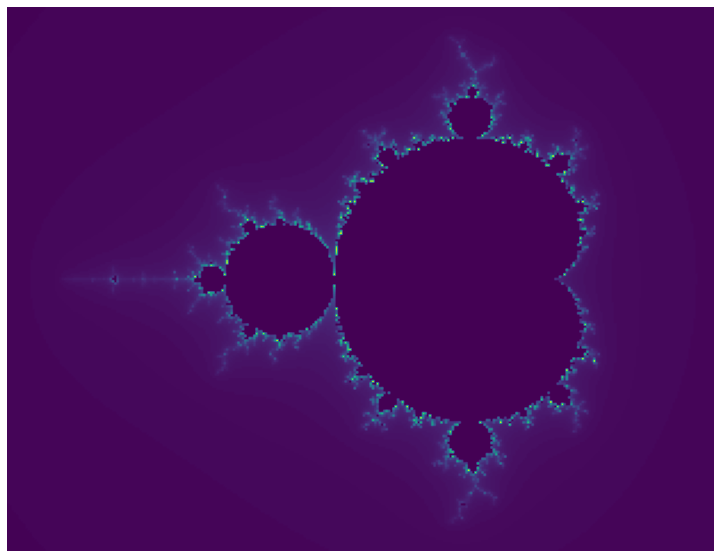

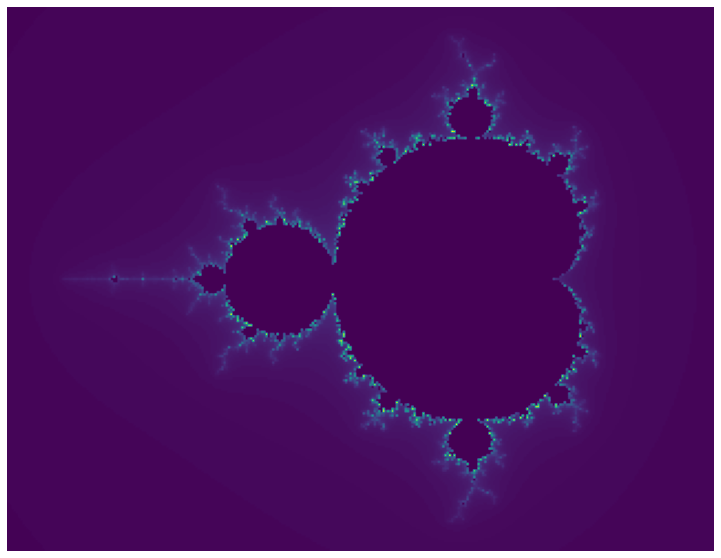

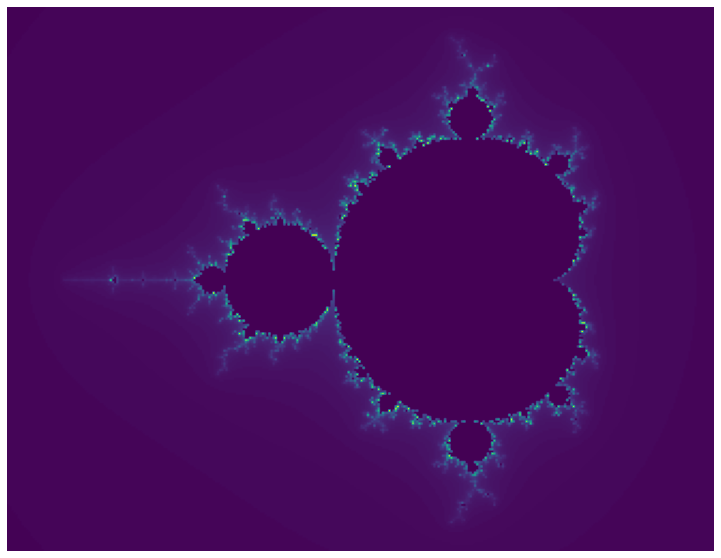

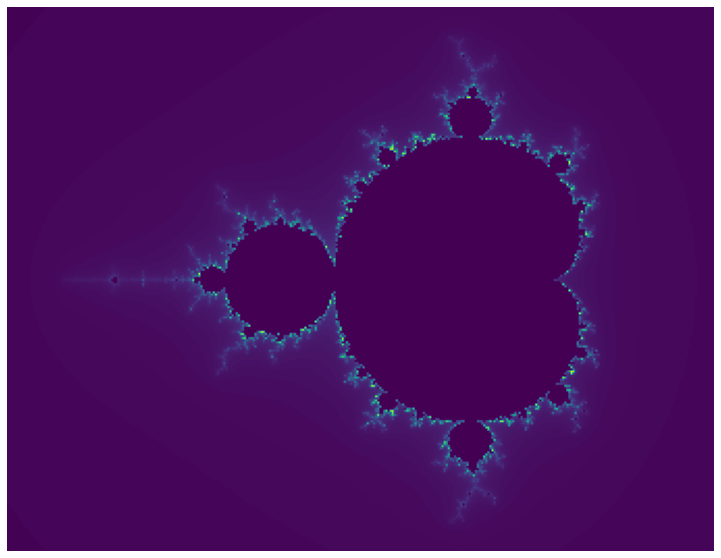

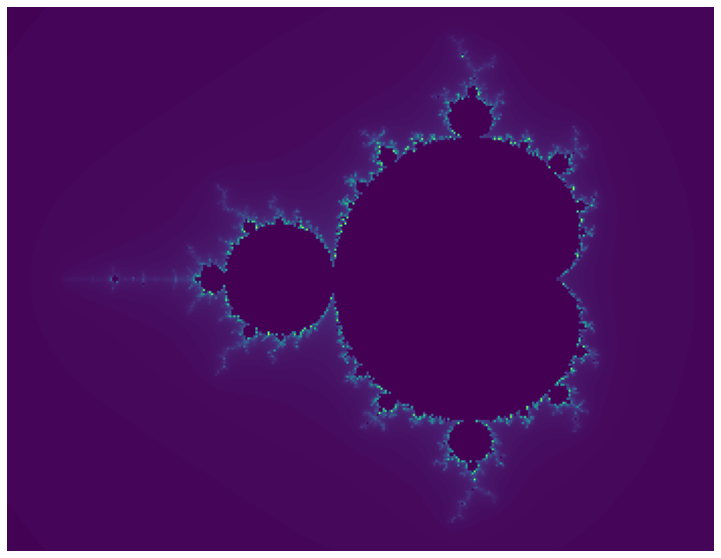

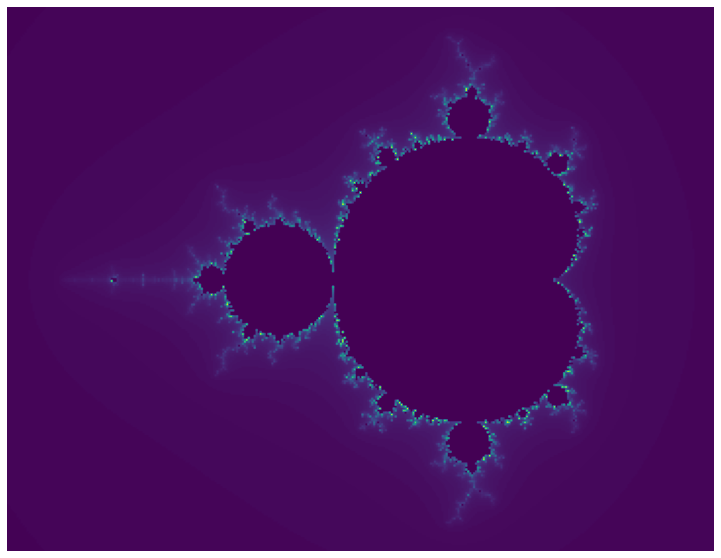

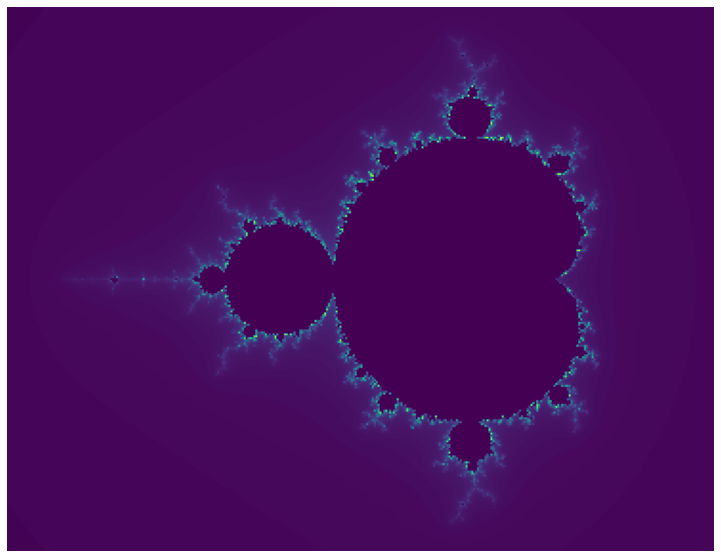

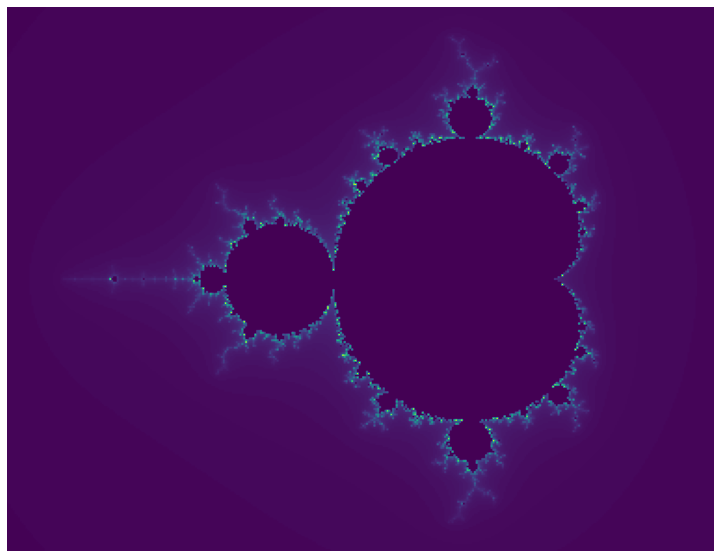

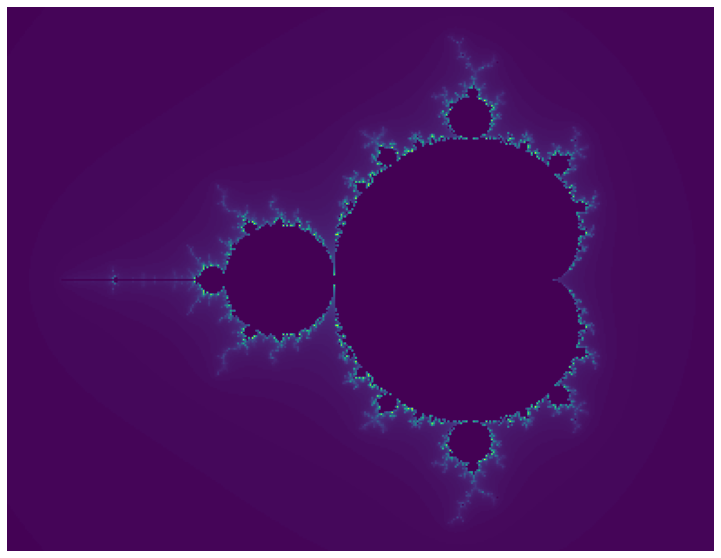

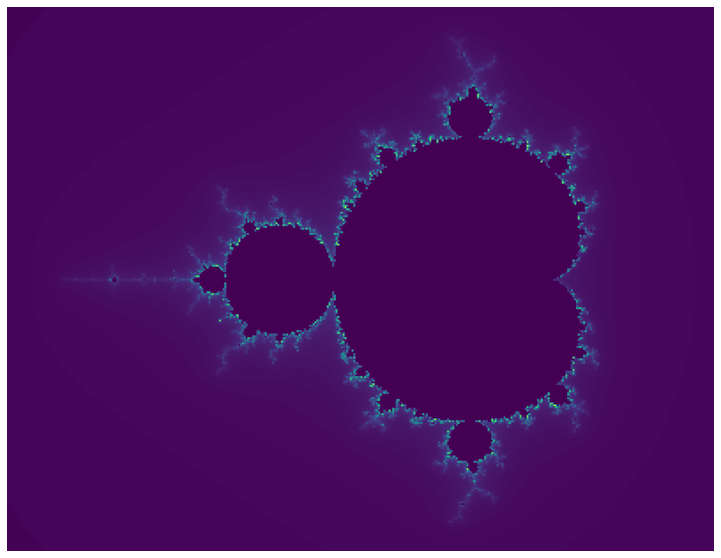

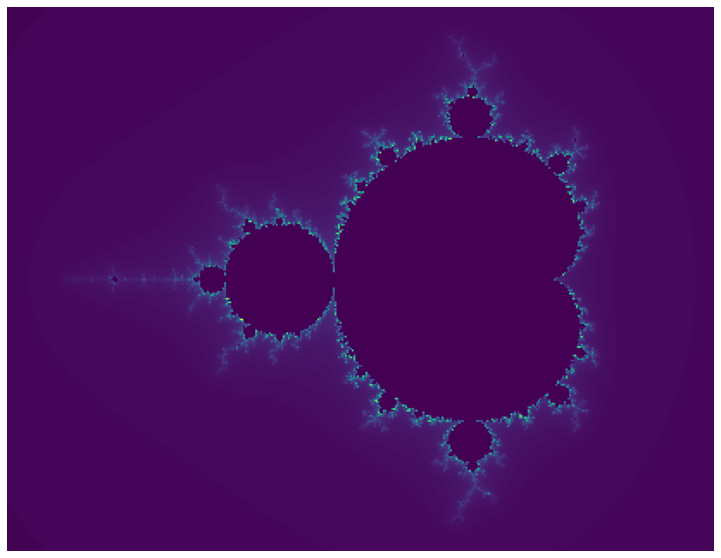

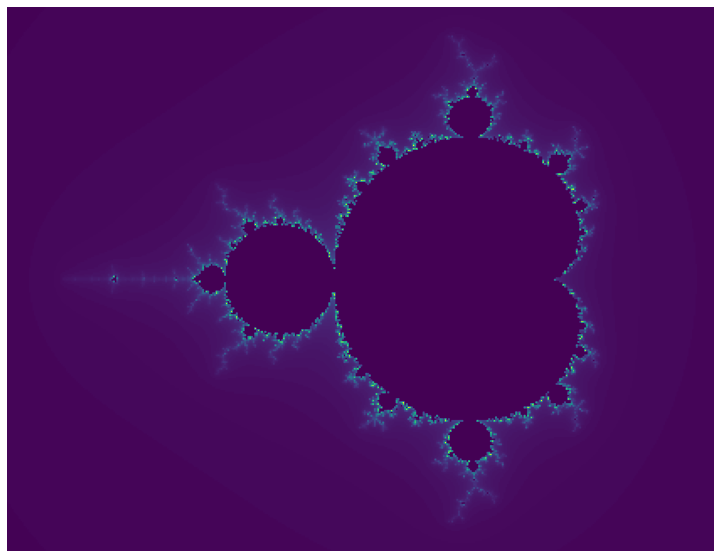

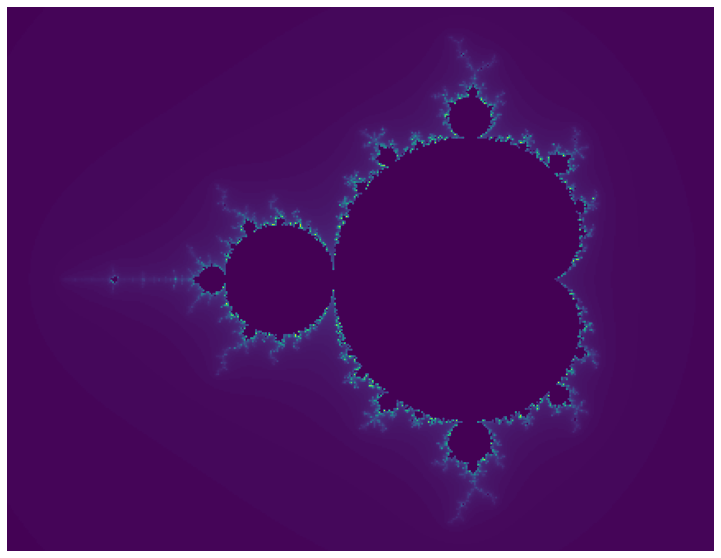

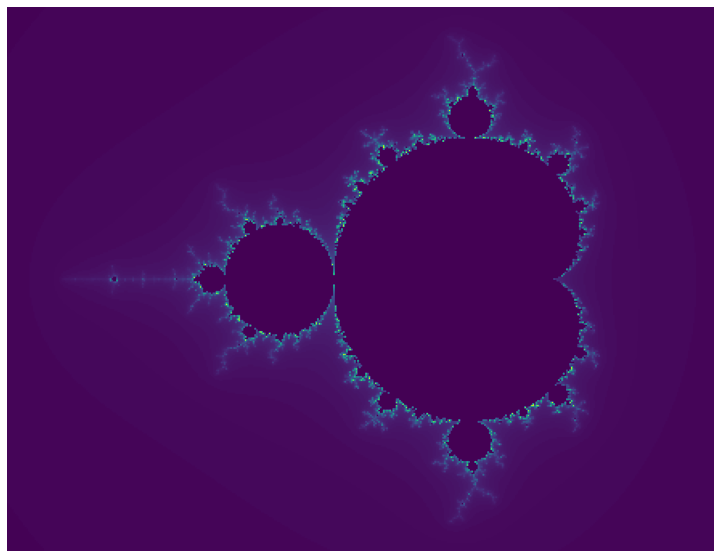

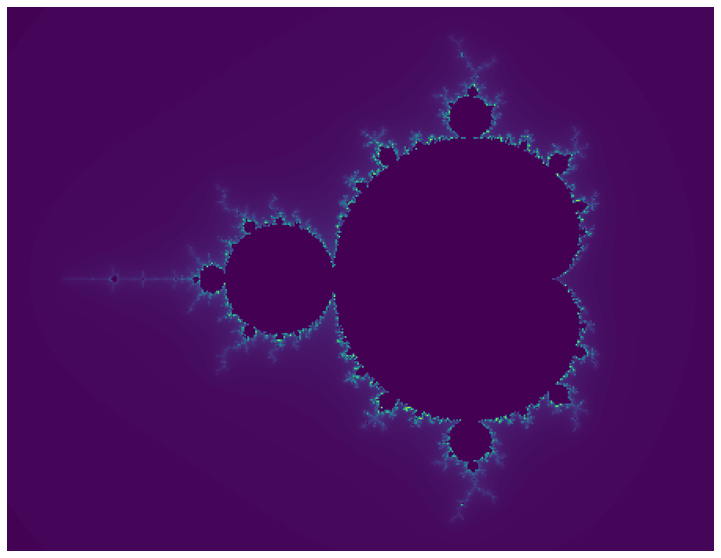

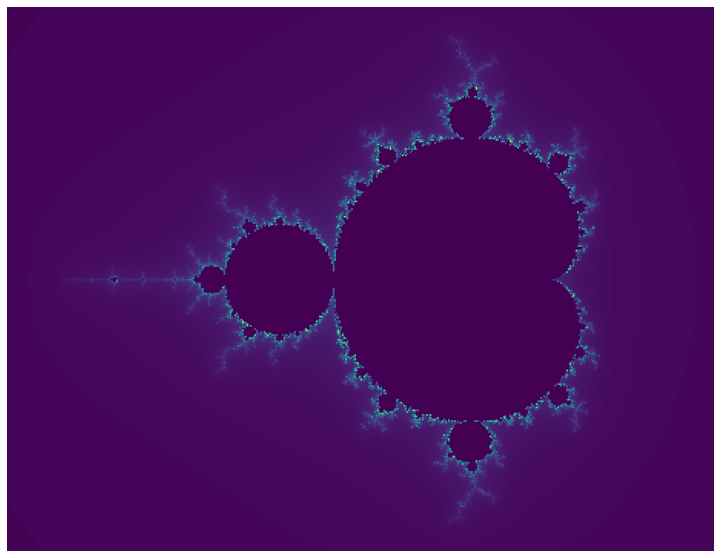

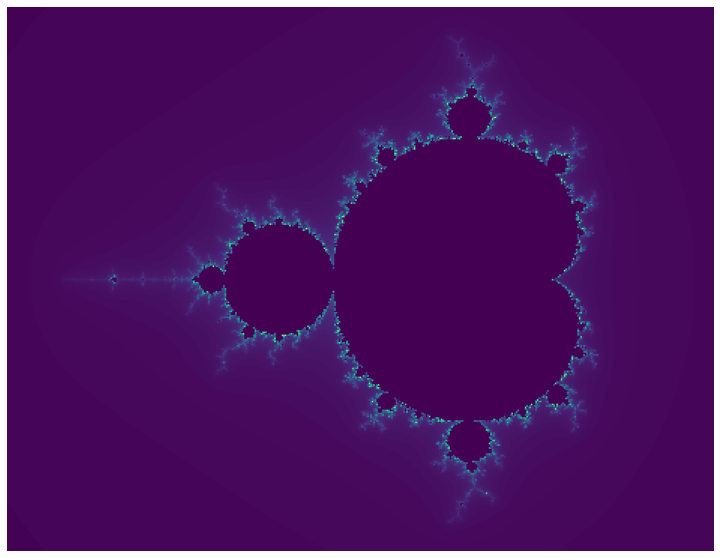

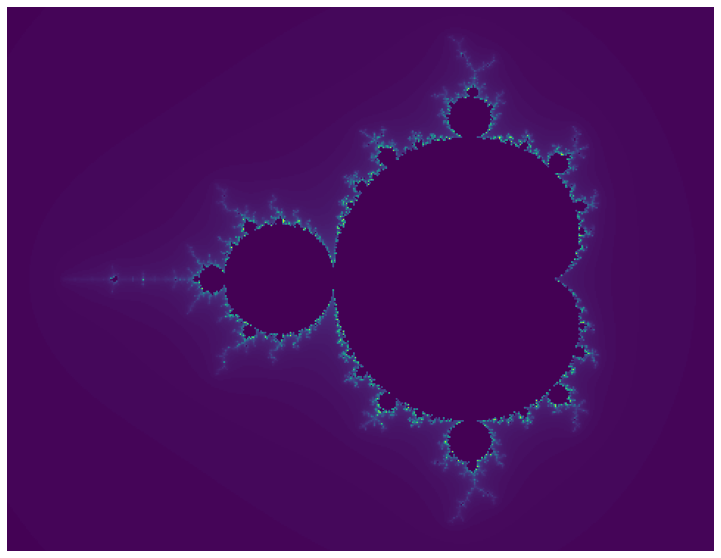

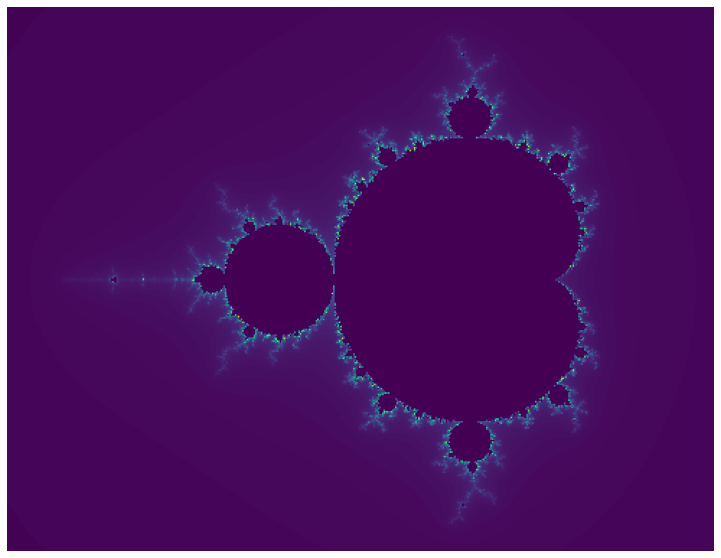

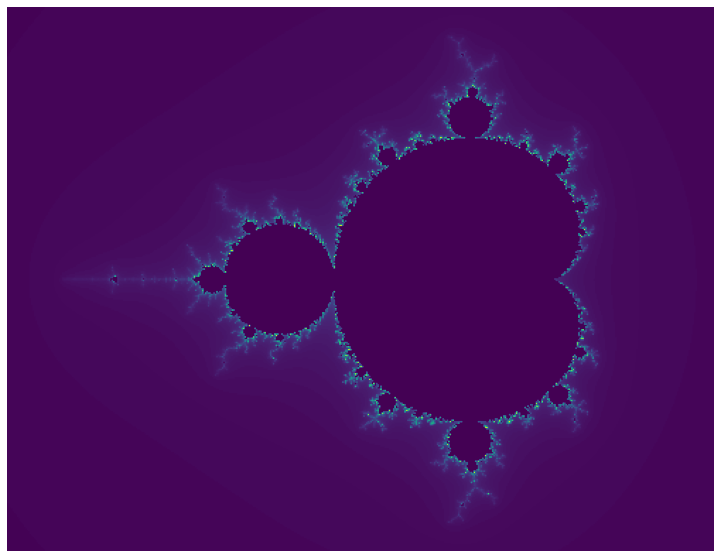

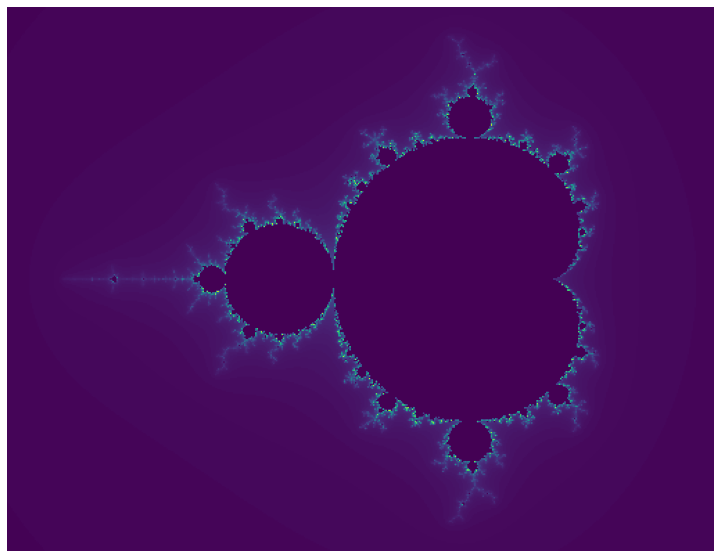

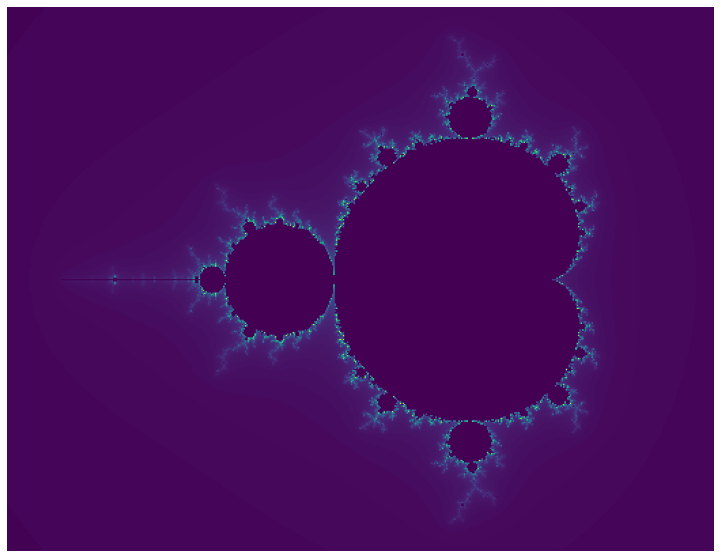

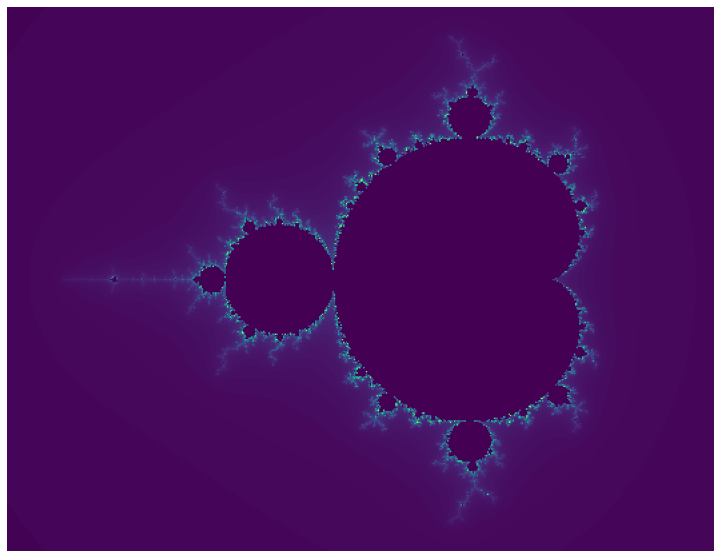

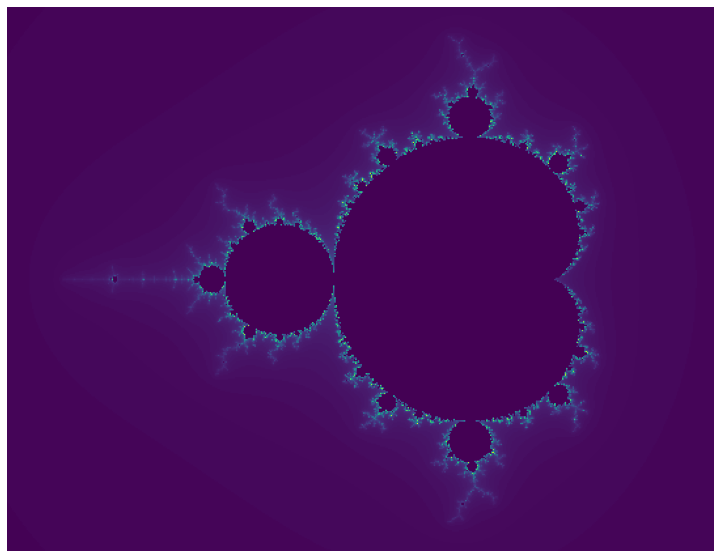

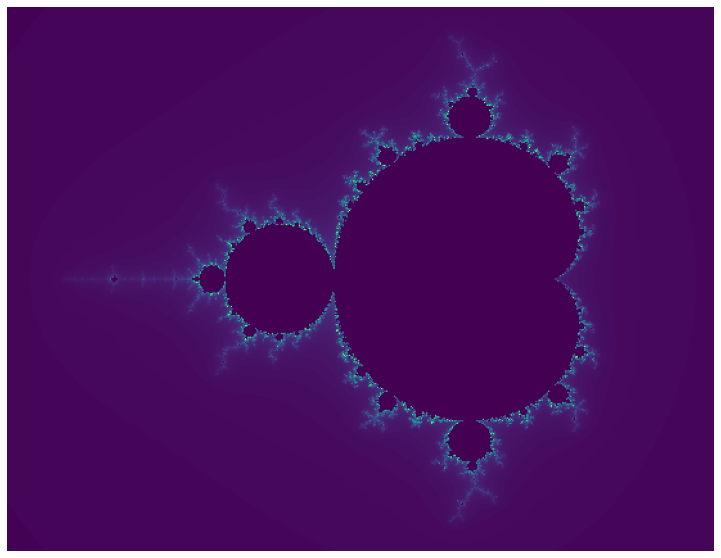

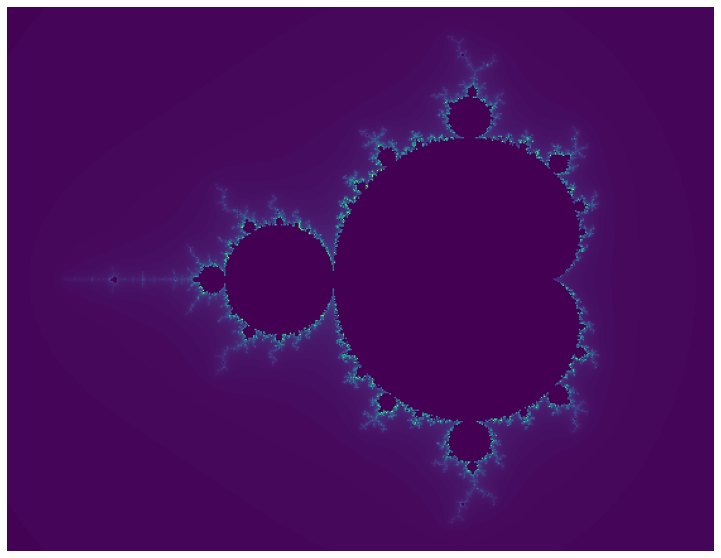

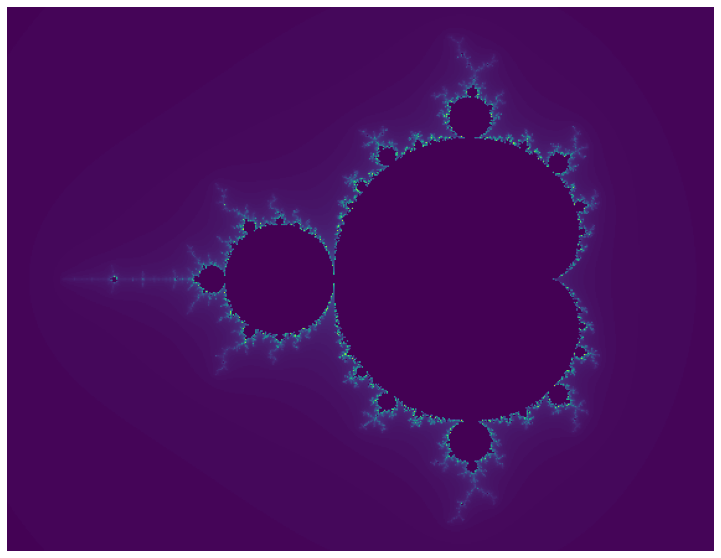

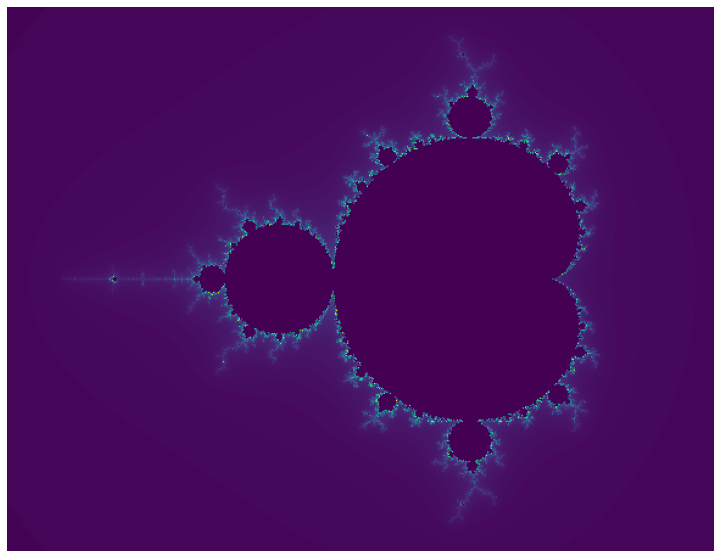

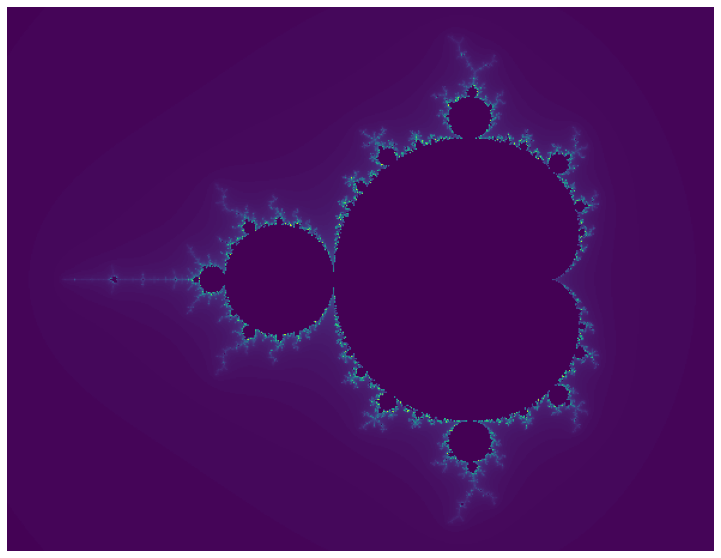

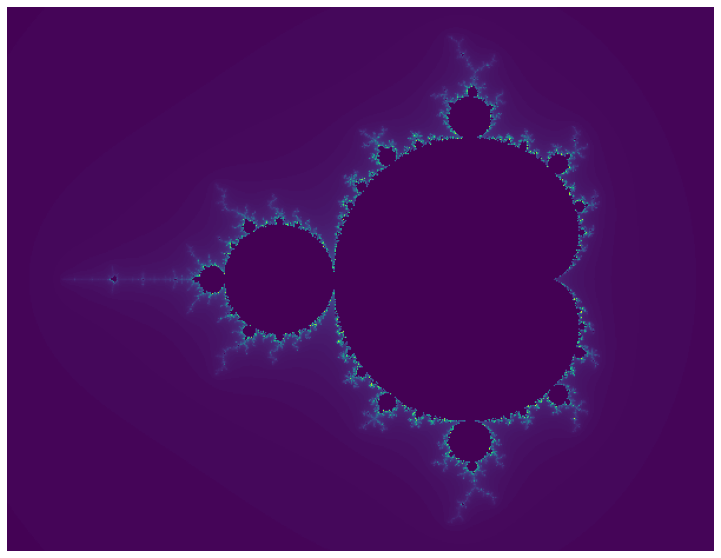

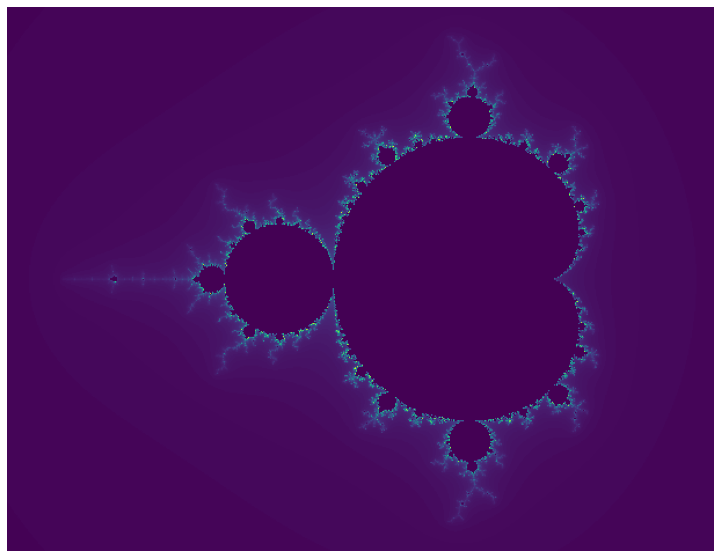

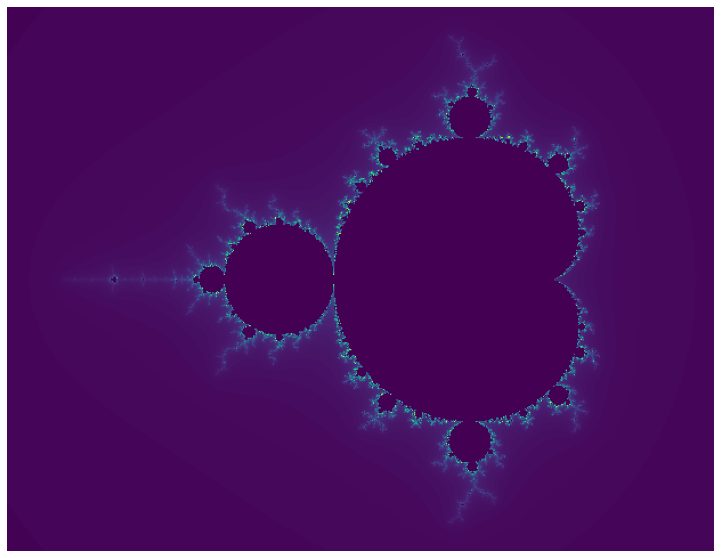

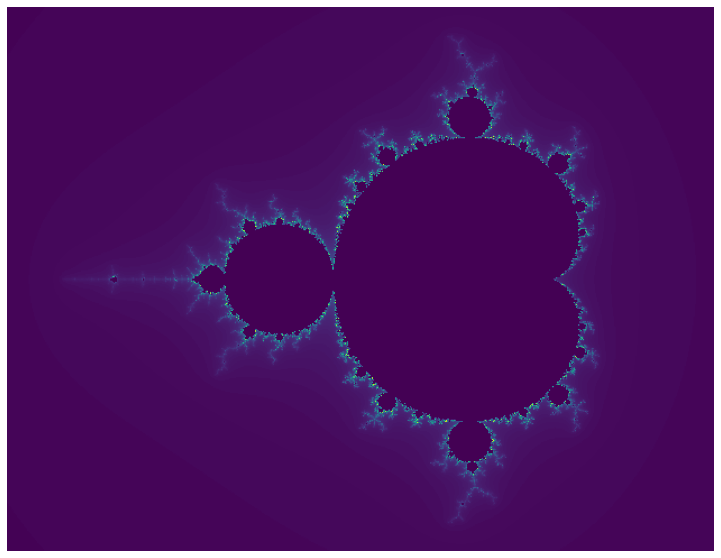

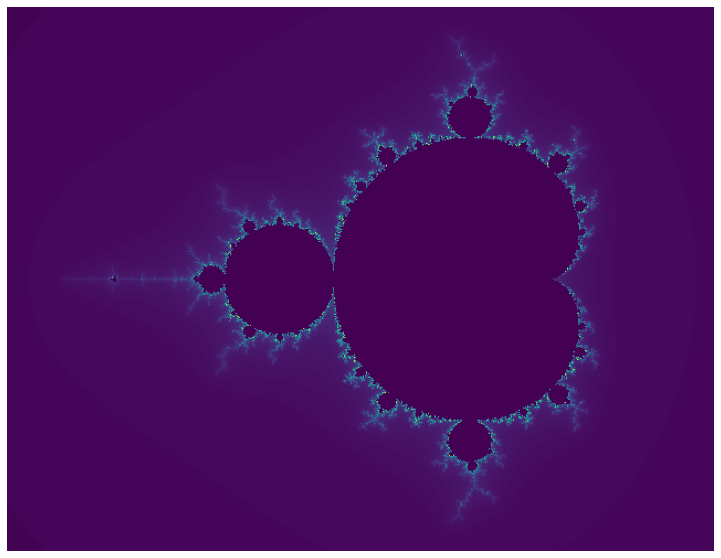

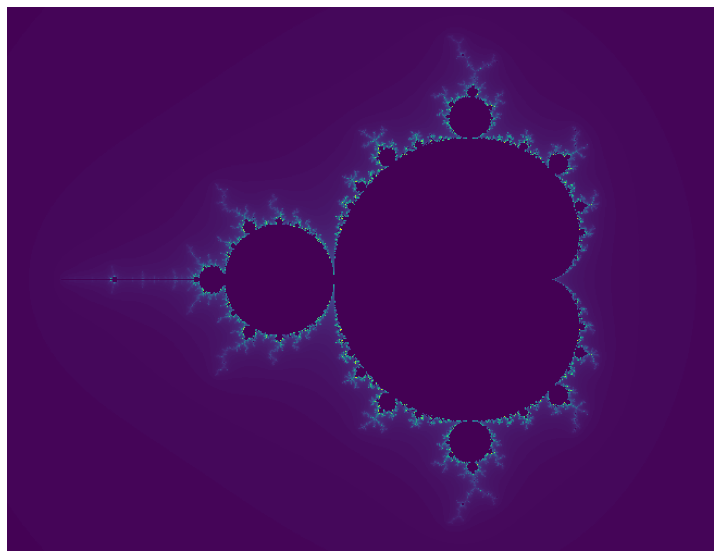

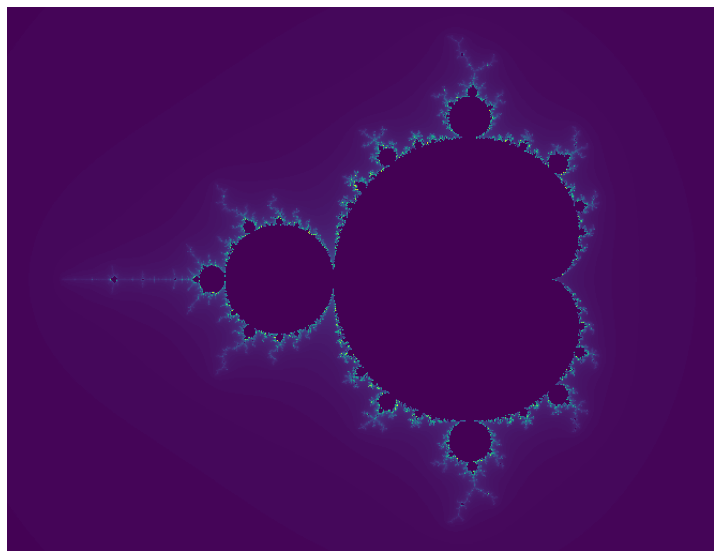

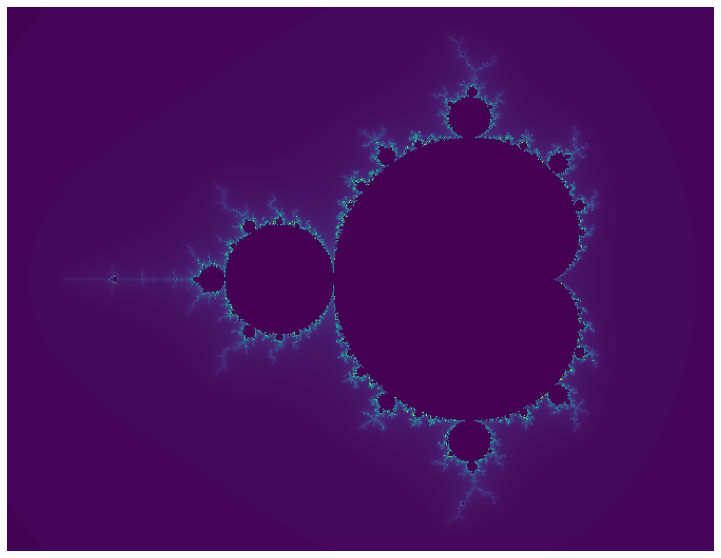

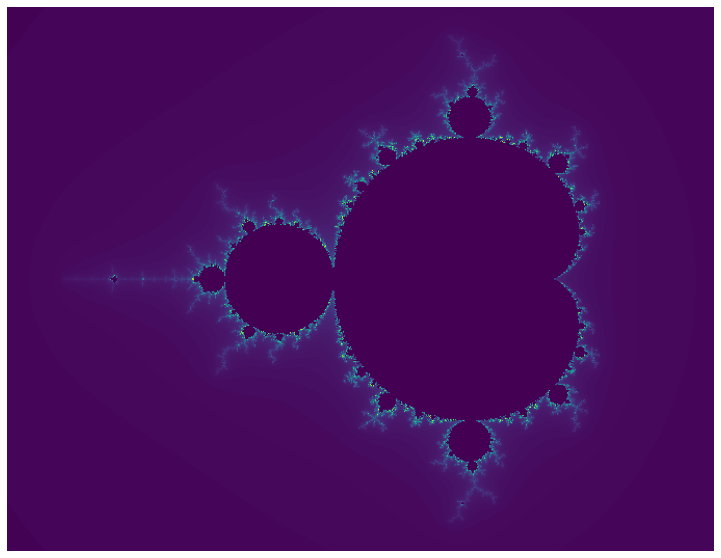

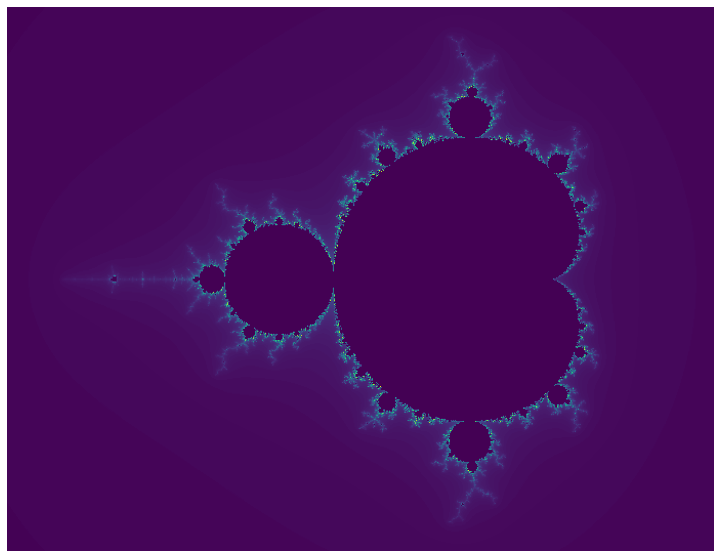

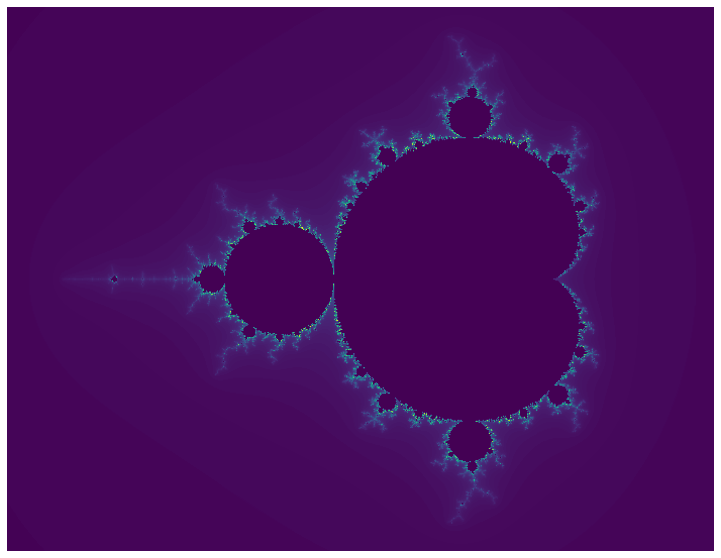

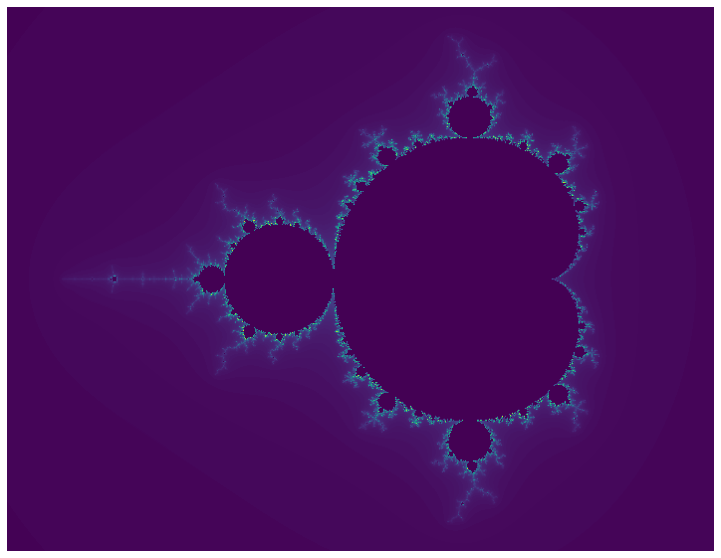

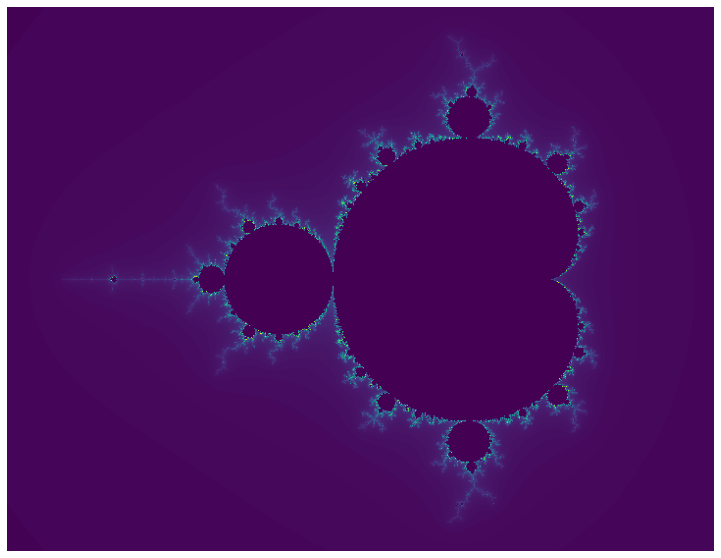

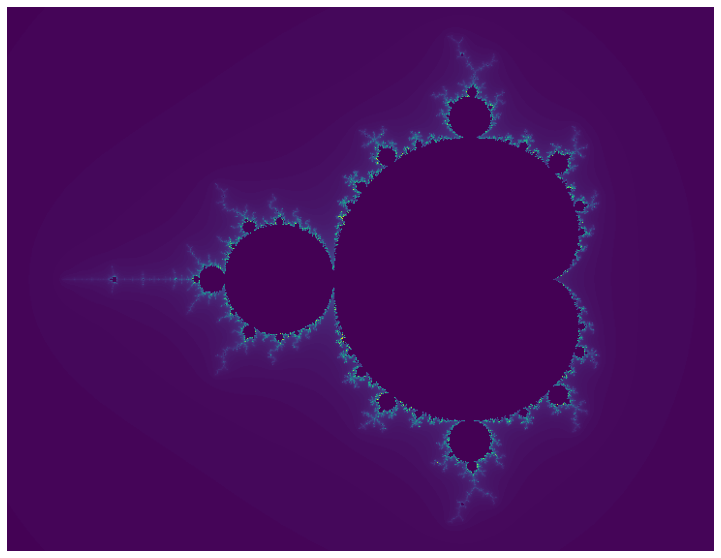

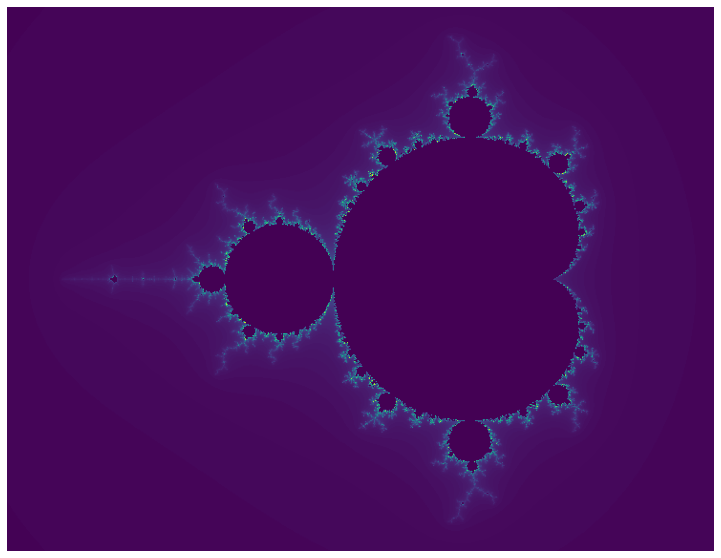

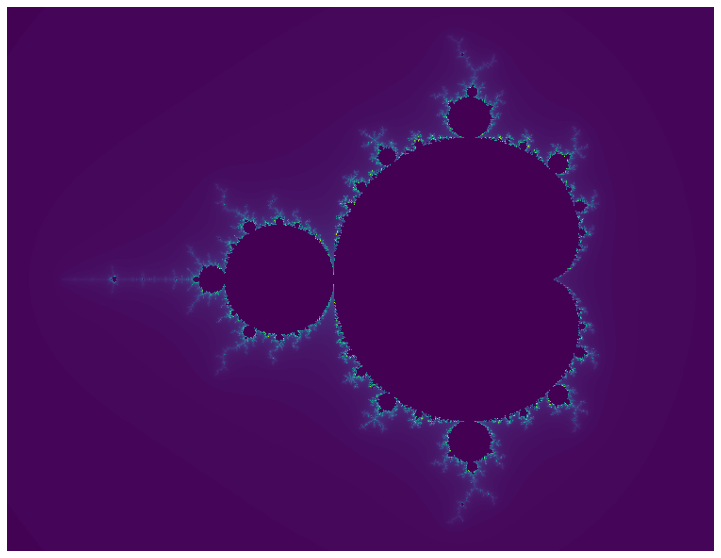

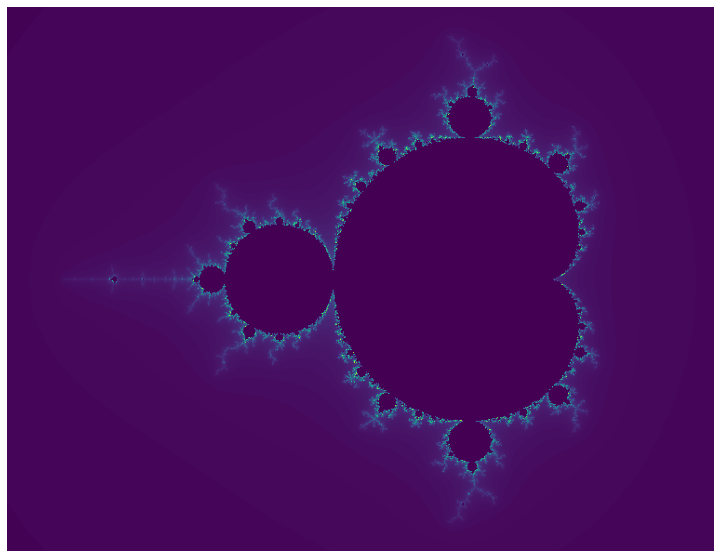

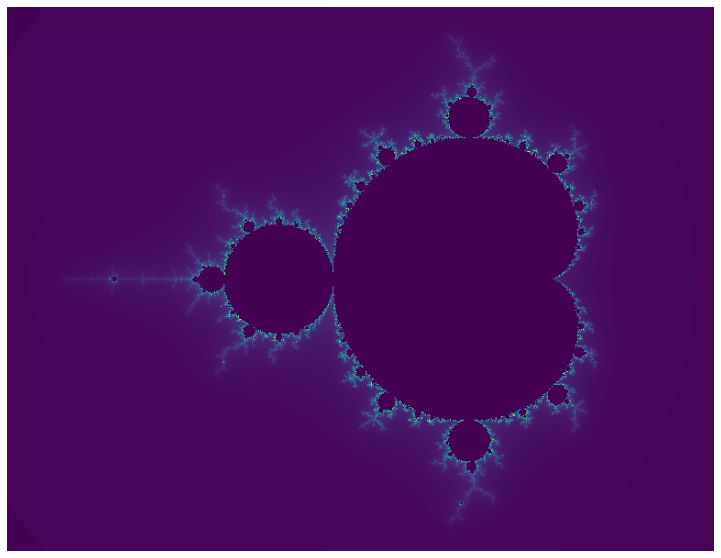

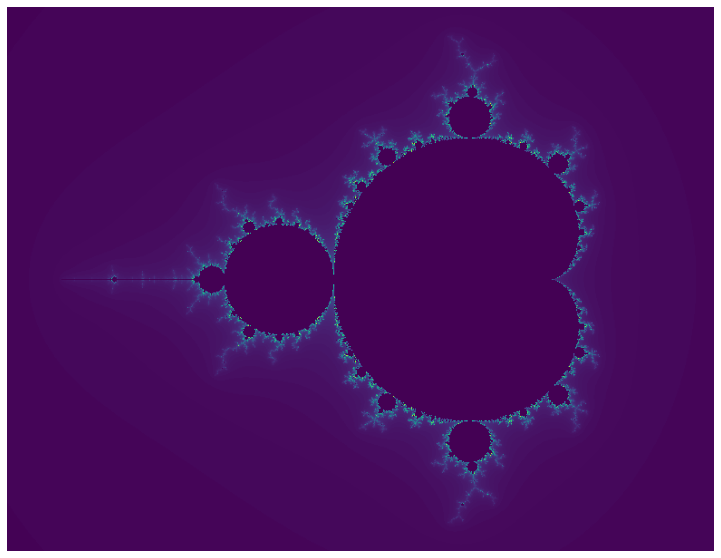

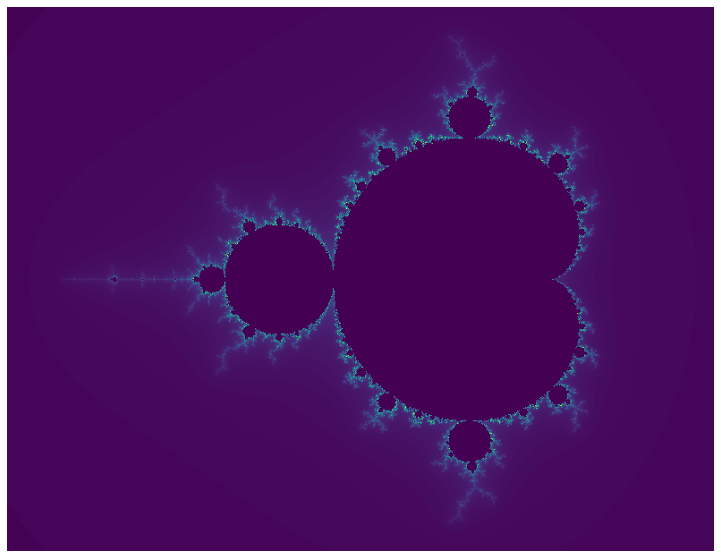

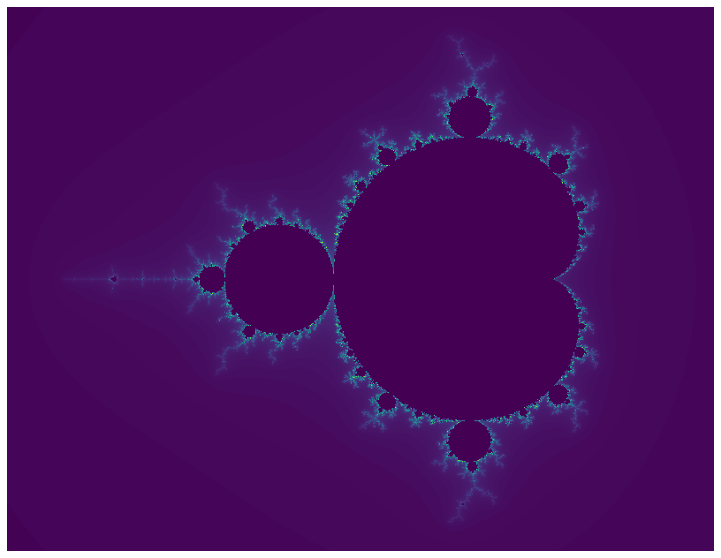

In [150]:
# Generarémos 100 imágenes en función de res, la resolución
rs = range(10, 803, 10) # 10, 1001, 10
for r in rs:
    plot_mandelbrot(2, r)

In [151]:
# Importamos el modulo
import imageio

# Creamos una lista con el nombre de las imagenes
file_nms = [f'mandelbrot_2_{r}.png' for r in rs]

# Creamos una lista de imagenes con el método imread
images = []
for file_name in file_nms:
    images.append(imageio.imread(file_name))

# Generamos el gif
imageio.mimsave('MandelbrotRes.gif', images)